In [1]:
import os
import cartopy.crs as ccrs
import sys
import glob
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import xarray as xr
import datetime
from pathlib import Path
import netCDF4
import matplotlib.dates as mdates

In [2]:
path_file= Path(r"C:\Users\vazqu\OneDrive - UQAM\UQAM\5e session\Laboratoire3\tp1\imerg_pr_201911_3h.nc4")

In [3]:

print('Reading file: ',path_file)
ds_i = xr.open_dataset(path_file,engine="netcdf4")
print('Reading file: DONE')
precipitation = ds_i['precipitationCal']
lons = ds_i['lon']
lats = ds_i['lat']
temps = ds_i['time']


Reading file:  C:\Users\vazqu\OneDrive - UQAM\UQAM\5e session\Laboratoire3\tp1\imerg_pr_201911_3h.nc4
Reading file: DONE


In [4]:
#Coordonne des villes souhaités
Kuala_cor= {"lat":3.1,"lon":101.6}
Montreal_cor={"lat":45.5,"lon":-73.5}
ocean_cor={"lat":5.0,"lon":106.0}
sevile_cor={"lat":37.4,"lon":-6}

In [5]:
#Prendre les data sets des coordonne les plus proches
kuala_ds = ds_i.sel(Kuala_cor,method='nearest')
mtl_ds = ds_i.sel(Montreal_cor,method='nearest')
ocean_ds = ds_i.sel(ocean_cor,method='nearest')
seville_ds = ds_i.sel(sevile_cor,method='nearest')

liste_nom_ville=["Kuala","MTL","Ocean","Seville"]


kuala_pand=kuala_ds.to_dataframe()
mtl_pand=mtl_ds.to_dataframe()
ocean_pand=ocean_ds.to_dataframe()
seville_pand=seville_ds.to_dataframe()


In [6]:
liste_ville=[kuala_pand,mtl_pand,ocean_pand,seville_pand]
liste_ville_n=[]
for ville in liste_ville:
    ville=ville.reset_index(level='bnds',drop=True)
    ville=ville.drop('time_bnds',axis=1)
    #ville.index=ville.index.strftime('%d-%H')
    ville.reset_index()
    ville=ville[~ville.index.duplicated(keep='first')]
    liste_ville_n.append(ville)



In [7]:
#print((liste_ville_n[1])['precipitationCal'].values)

[6.9848614e+00 5.9307361e+00 1.2368222e+00 0.0000000e+00 5.6035616e-02
 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.1519322e-02 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.7417192e-02 8.6553052e-02 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.1932462e-01
 7.3038777e-03 1.5409701e-01 1.0202855e-01 7.9418957e-01 4.2734826e-01
 8.6270267e-01 8.1602687e-01 6.4594942e-01 1.3152570e+00 1.5485355e-01
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 6.0174894e-03 0.0000000e+00
 5.9984088e-02 1.4587776e-01 1.0412814e-01 2.0190293e-01 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.000

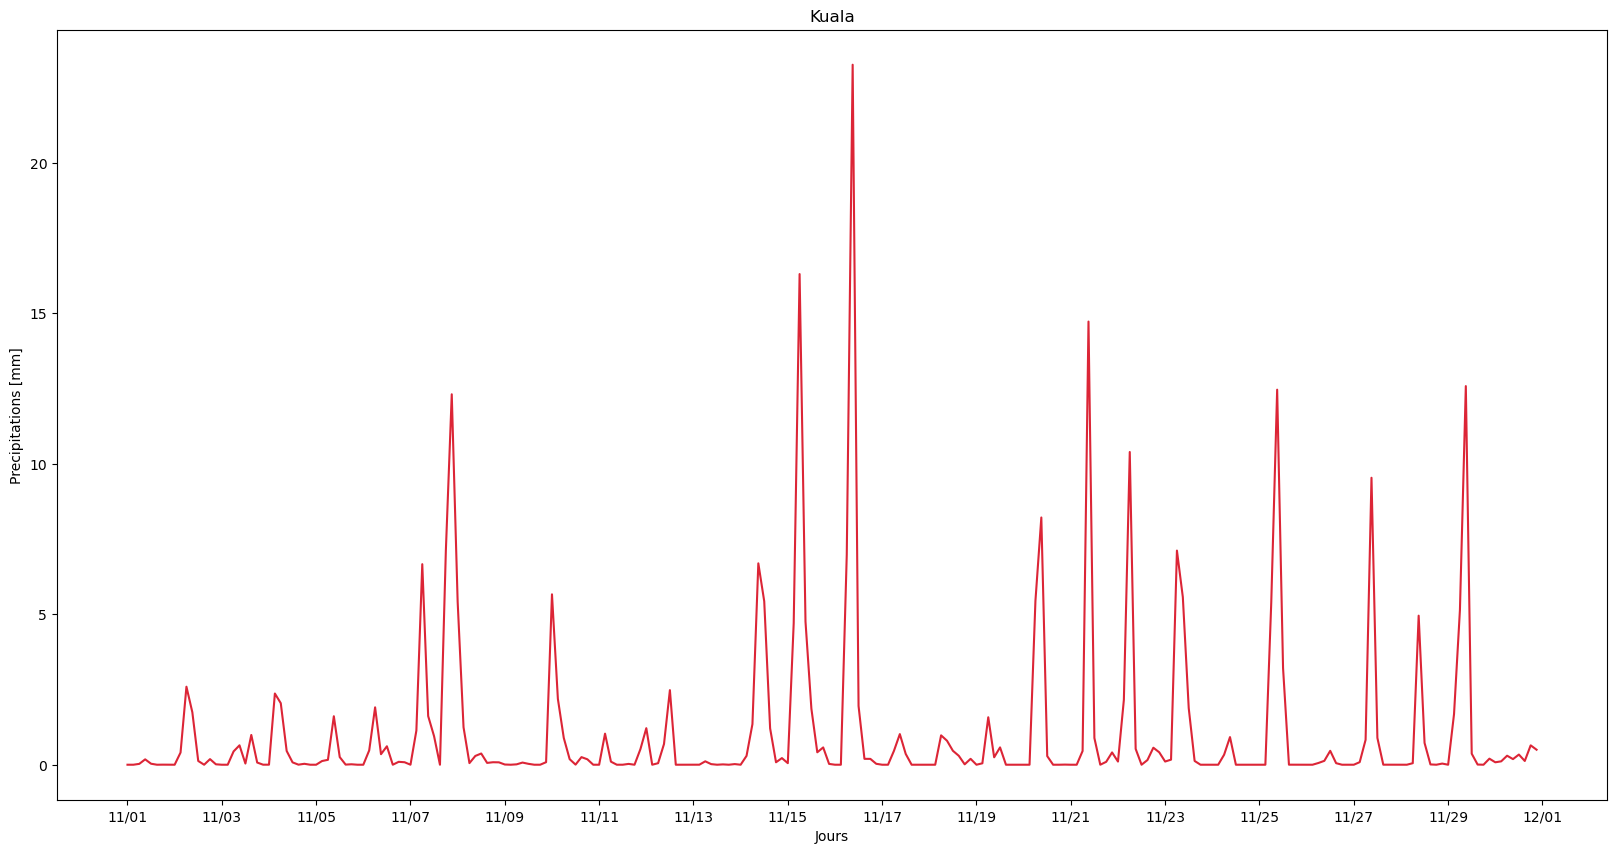

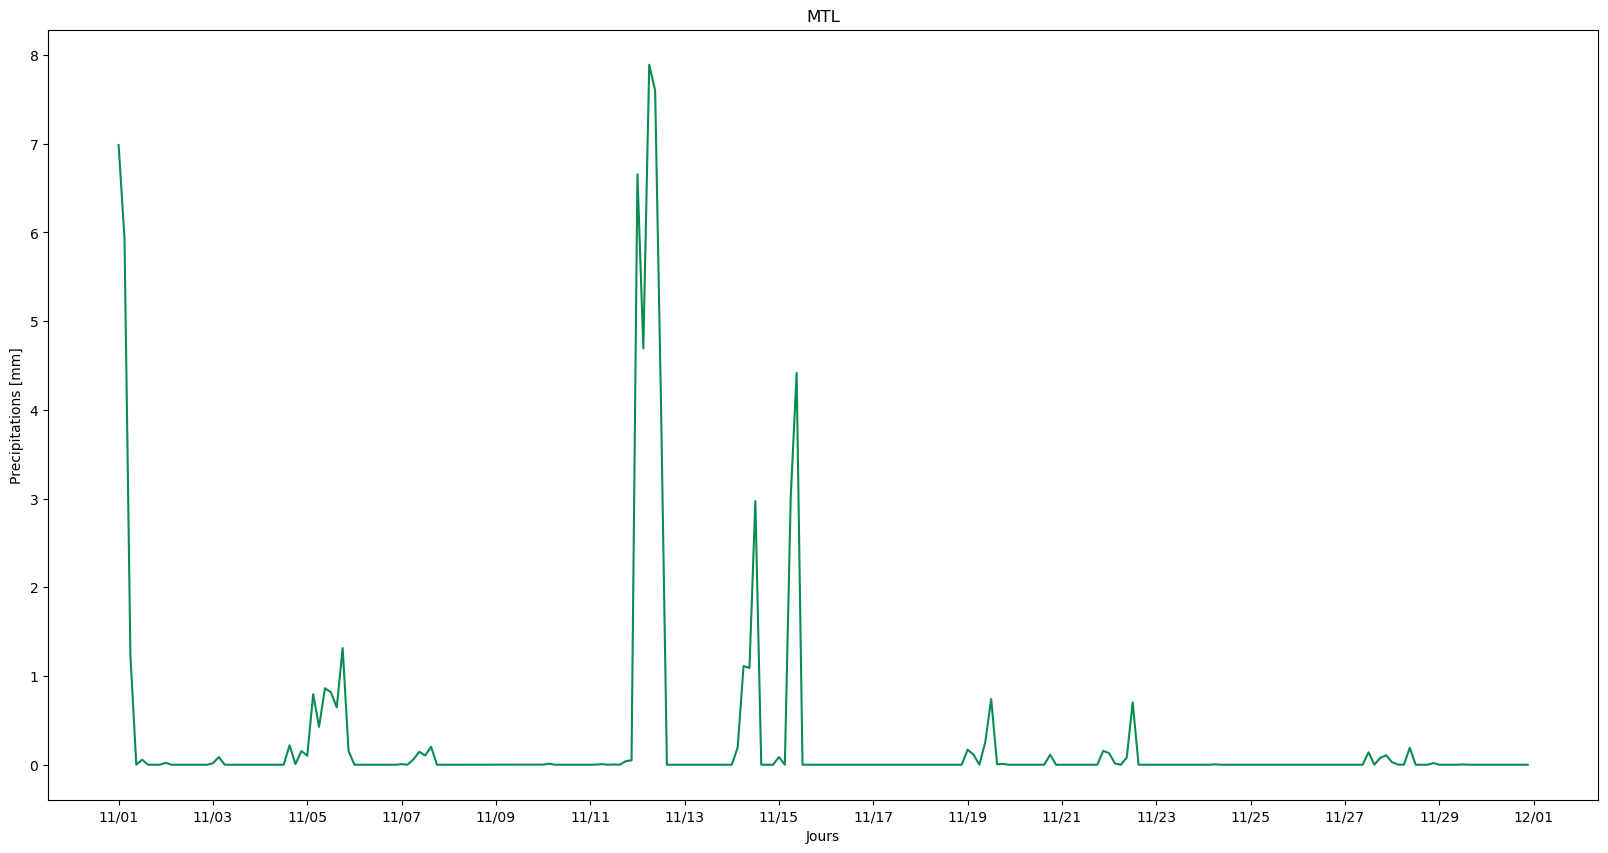

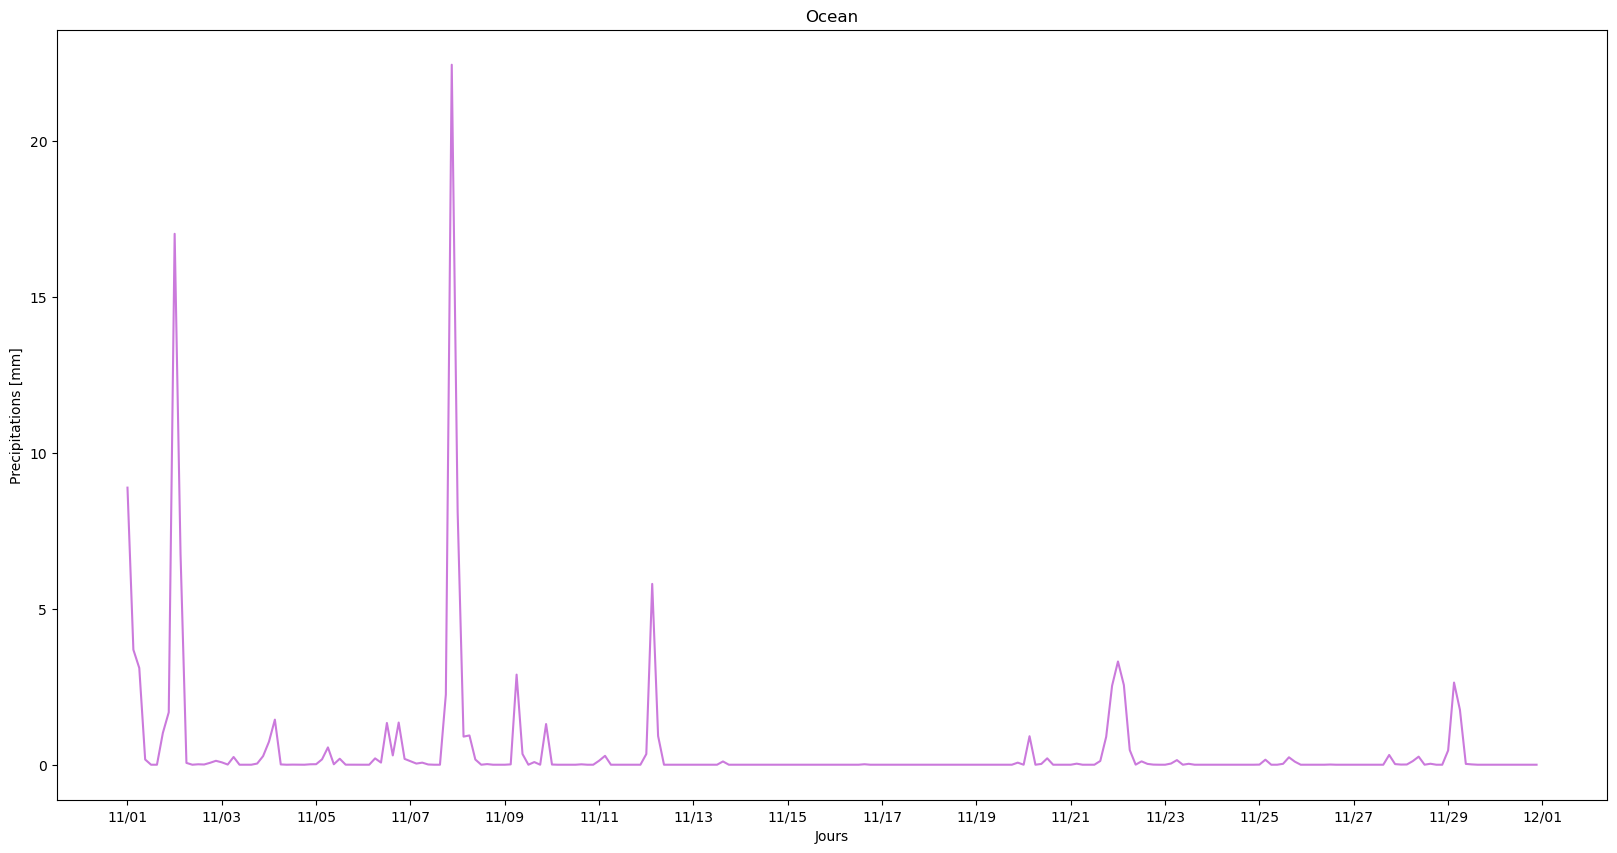

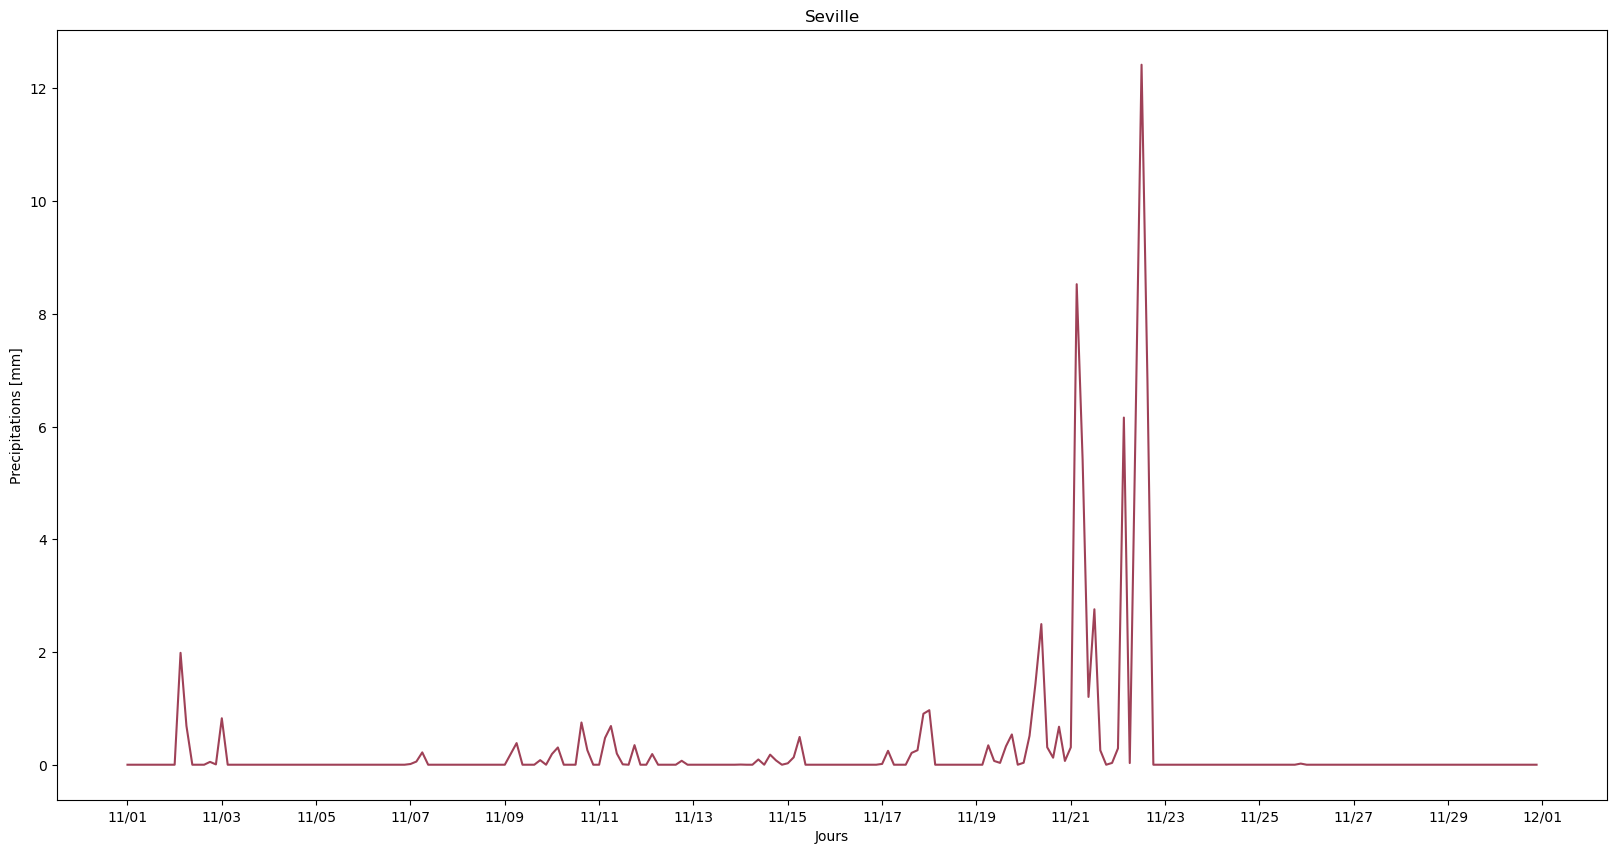

In [13]:
i=0
for ville in liste_ville_n:
    x=ville.index.values
    y=ville['precipitationCal'].values
    fig, ax = plt.subplots(1,1,figsize=(20,10))
    col=(np.random.random(), np.random.random(), np.random.random())
    ax.plot(x,y,c=col)
    ax.set_ylabel('Precipitations [mm]')
    ax.set_xlabel('Jours')
    ax.set_title(liste_nom_ville[i])
    i=i+1
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    plt.show()

In [17]:
#Precipitationb
somme_precip=[]
for ville in liste_ville_n:
    somme_precip.append(ville['precipitationCal'].sum())
    
print(somme_precip)

[np.float32(277.08072), np.float32(67.31239), np.float32(114.86565), np.float32(68.88995)]


In [35]:
#Nombre de donne de 3h avec plus de 0 mm de precipitations
nb_lignes_new=[]
nb_lignes_old=[]
for ville in liste_ville_n:
    df_new=ville[ville['precipitationCal']!=0]
    nb_lignes_old.append(len(ville['precipitationCal']))
    nb_lignes_new.append(len(df_new))
print(nb_lignes_old)
print(nb_lignes_new)

[240, 240, 240, 240]
[167, 64, 97, 64]
